## We used this file from https://www.kaggle.com/code/tleonel/monkeypox-cnn-78 as the architecture of our CNN

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

# Keras - tensorflow
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
import tensorflow.keras.models

In [2]:
tf.keras.utils.set_random_seed(42)

In [3]:
train_loc = 'Fold1/Fold1/Train'
val_loc = 'Fold1/Fold1/Val'
test_loc = 'Fold1/Fold1/Test'

In [4]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)
test = ImageDataGenerator(rescale = 1/255)

In [5]:
## Load the dataset 
train_dataset = train.flow_from_directory(directory=train_loc,
                                     classes = ['Others', 'Monkeypox'],
                                      target_size=(224,224),
                                      class_mode = "binary",
                                      batch_size=32,
                                      shuffle=True,
                                      seed=42)

validation_dataset = validation.flow_from_directory(directory=val_loc,
                                           classes = ['Others', 'Monkeypox'],
                                           target_size=(224,224),
                                           class_mode = "binary",
                                           batch_size=32,
                                           shuffle=True,
                                           seed=42)

test_dataset = test.flow_from_directory(directory=test_loc,
                                     classes = ['Others', 'Monkeypox'],
                                     target_size=(224,224),
                                     class_mode = "binary",
                                     batch_size=32,
                                     shuffle=False,
                                     seed = 42)

Found 2142 images belonging to 2 classes.
Found 420 images belonging to 2 classes.
Found 45 images belonging to 2 classes.


In [6]:
print('*' * 80)
print(f'Training Classes and shape: ',train_dataset.class_indices, train_dataset.image_shape)
print(f'Validation Clases and shape: ',validation_dataset.class_indices, validation_dataset.image_shape )
print(f'Test Classes and shape: ',test_dataset.class_indices, test_dataset.image_shape)
print('*' * 80)

********************************************************************************
Training Classes and shape:  {'Others': 0, 'Monkeypox': 1} (224, 224, 3)
Validation Clases and shape:  {'Others': 0, 'Monkeypox': 1} (224, 224, 3)
Test Classes and shape:  {'Others': 0, 'Monkeypox': 1} (224, 224, 3)
********************************************************************************


Function to visualize training/validation accuracy and error

In [7]:
def plot_history(history):
    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="val accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="val error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

## Architecture of the CNN

In [8]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape = (224,224,3)), ### 1st conv layer
                                    tf.keras.layers.MaxPool2D((2,2), strides=(2, 2)),
                                    #tf.keras.layers.Dropout(0.2),
                                    #tf.keras.layers.BatchNormalization(),

                                    ## 2nd conv layer
                                    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D((2,2), strides=(2, 2)),
                                    #tf.keras.layers.Dropout(0.1),
                                    #tf.keras.layers.BatchNormalization(),

                                    ## 3rd conv layer
                                    tf.keras.layers.Conv2D(32,(2,2), activation='relu'),
                                    tf.keras.layers.MaxPool2D((2,2), strides=(2, 2)),
                                    #keras.layers.Dropout(0.2),
                                    #tf.keras.layers.BatchNormalization(),

                                    ### 4th conv layer
                                    tf.keras.layers.Conv2D(128,(2,2), activation='relu'),
                                    tf.keras.layers.MaxPool2D((2,2), strides=(2, 2)),
                                    #tf.keras.layers.BatchNormalization(),
    
    
                                    ### 5th conv layer
                                    tf.keras.layers.Conv2D(512,(2,2), activation='relu'),
                                    tf.keras.layers.MaxPool2D((2,2), strides=(2, 2)),
                                    tf.keras.layers.BatchNormalization(),

                                    ### flatten output and feed it into dense layer
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(32, activation='relu'),

                                    ## output layer
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                    ])

2022-12-13 20:30:46.127169: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Configure the optimizer and early stop setting(to prevent overfitting)

In [9]:
opt = tf.keras.optimizers.Adam(learning_rate=0.000005)

model.compile(optimizer=opt,loss = 'binary_crossentropy', metrics=['accuracy'])
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=5) # if the performance is not increasing for 5 epoches, stop training

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 53, 53, 32)        8224      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 32)       0

Epoch 1/32
67/67 [==============================] - 46s 683ms/step - loss: 0.6867 - accuracy: 0.5401 - val_loss: 0.6889 - val_accuracy: 0.6000
Epoch 2/32
67/67 [==============================] - 45s 675ms/step - loss: 0.6576 - accuracy: 0.6522 - val_loss: 0.6855 - val_accuracy: 0.6405
Epoch 3/32
67/67 [==============================] - 45s 665ms/step - loss: 0.6402 - accuracy: 0.6643 - val_loss: 0.6807 - val_accuracy: 0.6643
Epoch 4/32
67/67 [==============================] - 45s 678ms/step - loss: 0.6245 - accuracy: 0.6849 - val_loss: 0.6747 - val_accuracy: 0.7167
Epoch 5/32
67/67 [==============================] - 44s 654ms/step - loss: 0.6079 - accuracy: 0.6909 - val_loss: 0.6664 - val_accuracy: 0.7190
Epoch 6/32
67/67 [==============================] - 45s 671ms/step - loss: 0.5972 - accuracy: 0.6984 - val_loss: 0.6544 - val_accuracy: 0.7143
Epoch 7/32
67/67 [==============================] - 44s 661ms/step - loss: 0.5826 - accuracy: 0.7040 - val_loss: 0.6420 - val_accuracy: 0.7071

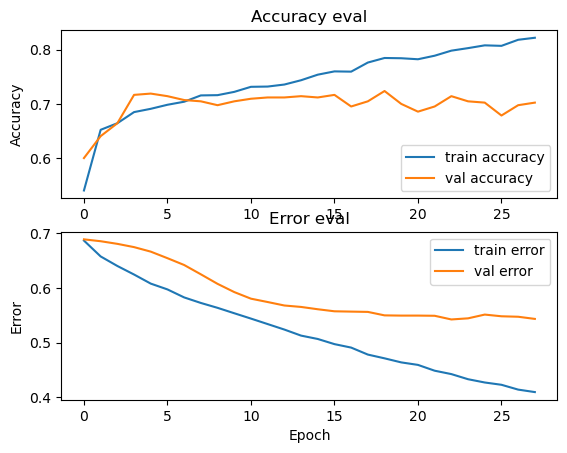

In [10]:
history = model.fit(train_dataset,
                     validation_data = validation_dataset,
                     epochs=32,
                     batch_size = 42,
                     callbacks= [early_stopping_callback]
                     )

print("Learning stoped on epoch:", early_stopping_callback.stopped_epoch)
plot_history(history)

In [12]:
#model.save('saved_model/cnn_model.h5') #save the model to make the results reproducible